In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

A  user  table  ( "takehome_users" )  with  data  on  12,000  users  who  signed  up  for  the
product  in  the  last  two  years.  

In [84]:
engagement = pd.read_csv('takehome_user_engagement.csv')

 A  usage  summary  table  ( "takehome_user_engagement" )  that  has  a  row  for  each  day
that  a  user  logged  into  the  product.

In [85]:
signup_df = pd.read_csv('takehome_users.csv',encoding = "ISO-8859-1")

Note daily cycles (at what time of day)
note weekly patterns, value_counts per day
month patterns, value_counts compared by month

In [86]:
engagement.dtypes

time_stamp    object
user_id        int64
visited        int64
dtype: object

In [87]:
engagement.time_stamp = pd.to_datetime(engagement.time_stamp)

In [88]:
print(engagement.shape)
engagement.head()

(207917, 3)


,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [89]:
engagement['Week']= engagement.time_stamp.dt.isocalendar().week
                     

In [90]:
engagement.head()

,time_stamp,user_id,visited,Week
0,2014-04-22 03:53:30,1,1,17
1,2013-11-15 03:45:04,2,1,46
2,2013-11-29 03:45:04,2,1,48
3,2013-12-09 03:45:04,2,1,50
4,2013-12-25 03:45:04,2,1,52


In [91]:
engagement_df = engagement.drop(columns=['time_stamp']).groupby(by=['user_id', 'Week']).sum().reset_index()

In [92]:
engagement=engagement.drop(columns=['Week'])

In [93]:
engagement_pivot = engagement_df.pivot(index='user_id',columns='Week', values='visited')
engagement_pivot.head()

Week,1,2,3,4,5,6,7,8,9,10,...,43,44,45,46,47,48,49,50,51,52
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,NaN,NaN,NaN,3.0,2.0,NaN,NaN,1.0,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
engagement_pivot['number_active_weeks'] = (engagement_pivot >= 3).sum(axis=1)
engagement_pivot['total_logins'] = engagement_pivot.drop(columns=['number_active_weeks']).sum(axis=1)

In [95]:
engagement_pivot['active_user'] = engagement_pivot['number_active_weeks'] >= 1

In [96]:
engagement_pivot.head()

Week,1,2,3,4,5,6,7,8,9,10,...,46,47,48,49,50,51,52,number_active_weeks,total_logins,active_user
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,False
2,1.0,1.0,NaN,NaN,NaN,3.0,2.0,NaN,NaN,1.0,...,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1,14.0,True
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,False
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,False
5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,False


In [97]:
engagement_pivot['first_login'] = engagement.groupby(by=['user_id']).min().time_stamp

In [98]:
engagement_pivot['last_login'] = engagement.groupby(by=['user_id']).max().time_stamp

In [99]:
engagement_pivot['first_active_week'] = engagement_df[engagement_df.visited>=3].drop(columns=['visited']).groupby(by=['user_id']).min()

In [100]:
data = engagement_pivot[['number_active_weeks','total_logins','active_user','first_login','last_login','first_active_week']]


In [101]:
data['first_login_week'] = data.first_login.dt.to_period('W').dt.to_timestamp()

/Users/Mateo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [102]:
data.head()

Week,number_active_weeks,total_logins,active_user,first_login,last_login,first_active_week,first_login_week
user_id,,,,,,,
1,0,1.0,False,2014-04-22 03:53:30,2014-04-22 03:53:30,NaN,2014-04-21
2,1,14.0,True,2013-11-15 03:45:04,2014-03-31 03:45:04,6.0,2013-11-11
3,0,1.0,False,2013-03-19 23:14:52,2013-03-19 23:14:52,NaN,2013-03-18
4,0,1.0,False,2013-05-22 08:09:28,2013-05-22 08:09:28,NaN,2013-05-20
5,0,1.0,False,2013-01-22 10:14:20,2013-01-22 10:14:20,NaN,2013-01-21


In [104]:
data.active_user.count()

8823

In [109]:
data = data.reset_index()

## Part 2

In [103]:
print(signup_df.shape)
signup_df.head()

(12000, 10)


,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [106]:
signup_df.index = signup_df.org_id

In [110]:
signup_df['active_user'] = data['active_user']

In [111]:
signup_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,active_user
org_id,,,,,,,,,,,
11,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,True
94,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,False
1,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,True
193,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,False


In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
signup_df.corr()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,active_user
object_id,1.000000,0.015238,-0.032370,-0.022040,0.004110,0.018699,-0.004963
last_session_creation_time,0.015238,1.000000,0.006590,0.008035,0.042203,0.011874,0.019967
opted_in_to_mailing_list,-0.032370,0.006590,1.000000,0.483529,0.003432,0.004699,-0.031108
enabled_for_marketing_drip,-0.022040,0.008035,0.483529,1.000000,0.009275,0.003687,-0.005897
org_id,0.004110,0.042203,0.003432,0.009275,1.000000,-0.057780,0.015803
invited_by_user_id,0.018699,0.011874,0.004699,0.003687,-0.057780,1.000000,-0.019201
active_user,-0.004963,0.019967,-0.031108,-0.005897,0.015803,-0.019201,1.000000


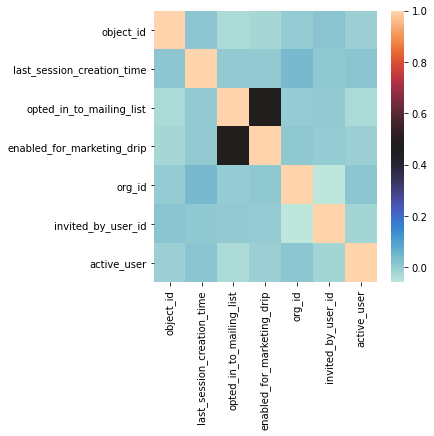

In [114]:
plt.figure(figsize=(5,5))

sns.heatmap(signup_df.corr(),cmap='icefire')

plt.show()